In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
sns.set_theme(style="whitegrid")

In [7]:
beers = pd.read_csv('BeerProject.csv', encoding_errors='ignore',nrows = 10000)
beers.head(3)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604


In [112]:
profileWithMostCountsQuery = "SELECT review_profileName, COUNT(review_profileName) AS review_count, SUM(CASE WHEN review_overall > 3 THEN 1 ELSE 0 END) AS positive_ratings FROM beers GROUP BY review_profileName ORDER BY COUNT (review_profileName) DESC LIMIT 20"
profileWithMostCounts = sqldf(profileWithMostCountsQuery)

famousBeerStyleQuery = "SELECT COUNT(beer_style) AS styles_number FROM beers GROUP BY beer_style ORDER BY styles_number DESC LIMIT 20"
famousBeerStyle = sqldf(famousBeerStyleQuery)

## Korisnici sa Najvise Reviewova

#### Korisnici poredani po broju reviewova i kolicinom pozitivnih reviewova

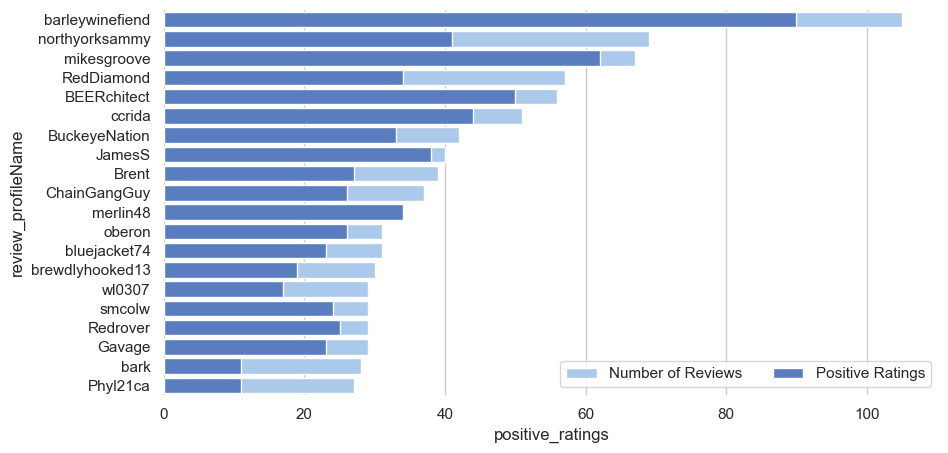

In [104]:
f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(x="review_count", y="review_profileName", data=profileNamesDataset, label="Number of Reviews", color="b")

sns.set_color_codes("muted")
sns.barplot(x="positive_ratings", y="review_profileName", data=profileNamesDataset,
            label="Positive Ratings", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

## Popularni Stilovi Pive

In [121]:
famousBeerStyleQuery = "SELECT beer_style, AVG(review_taste) as beer_taste, AVG(review_aroma) AS beer_aroma, COUNT(beer_style) AS style_count FROM beers GROUP BY beer_style ORDER BY style_count DESC LIMIT 20"
famousBeerStyle = sqldf(famousBeerStyleQuery)

print(famousBeerStyle)

                             beer_style  beer_taste  beer_aroma  style_count
0                Russian Imperial Stout    4.269598    4.285532         1569
1                          American IPA    3.815421    3.845327         1070
2               American Pale Ale (APA)    3.643084    3.665342          629
3        American Double / Imperial IPA    3.796569    3.813725          612
4                           Light Lager    2.450106    2.361996          471
5                       American Porter    3.797872    3.913564          376
6      American Double / Imperial Stout    3.564246    3.782123          358
7              American Amber / Red Ale    3.503425    3.452055          292
8                           Pumpkin Ale    3.638528    3.785714          231
9                        American Stout    3.290393    3.460699          229
10              Belgian Strong Pale Ale    3.771795    3.879487          195
11                       English Porter    3.467914    3.588235          187

## Kolicina Alkohola u Pivi

<AxesSubplot: xlabel='beer_taste', ylabel='beer_style'>

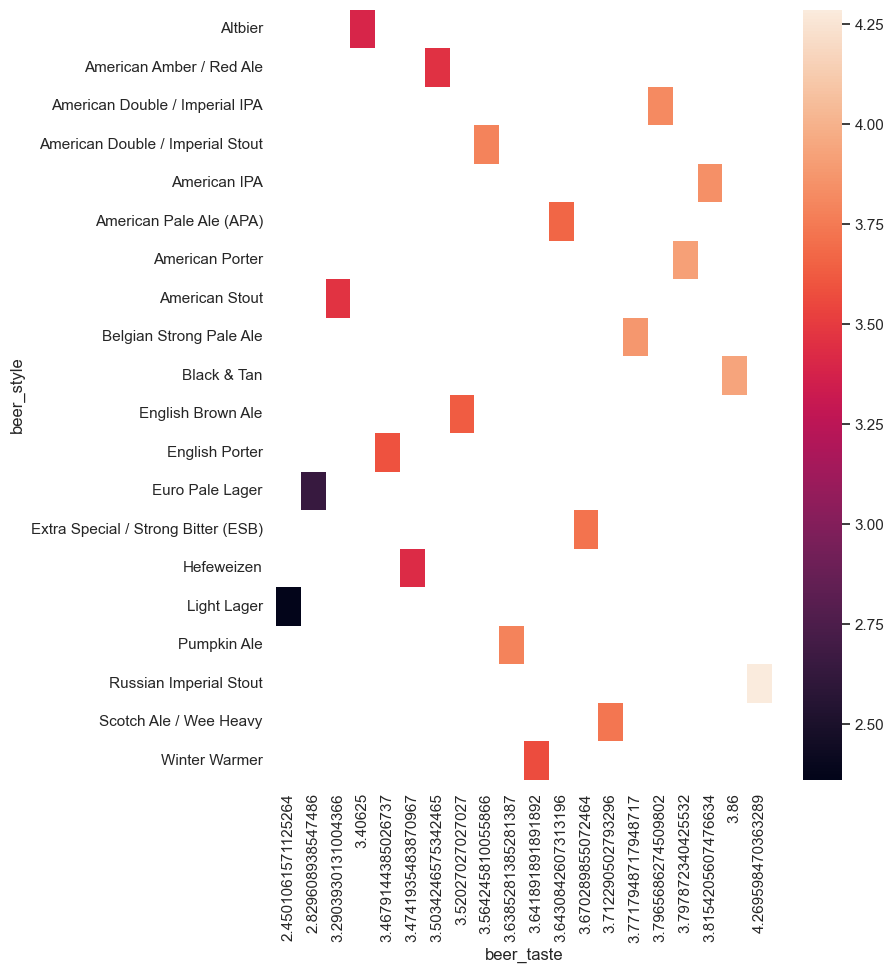

In [124]:
plt.figure(figsize=(8,10))
data = famousBeerStyle.pivot(index='beer_style', columns='beer_taste', values='beer_aroma')
sns.heatmap(data)

In [ ]:
x = beers["beer_ABV"]
y = beers["beer_beerId"]

plt.scatter(x,y)

In [ ]:
plt.figure(figsize=(20, 10))

x = beers['beer_ABV']
y = beers['beer_style']
plt.bar(x,y)
plt.plot()
plt.xlabel('beer_abv')
plt.ylabel('beer_style')


<AxesSubplot: xlabel='beer_ABV', ylabel='beer_style'>

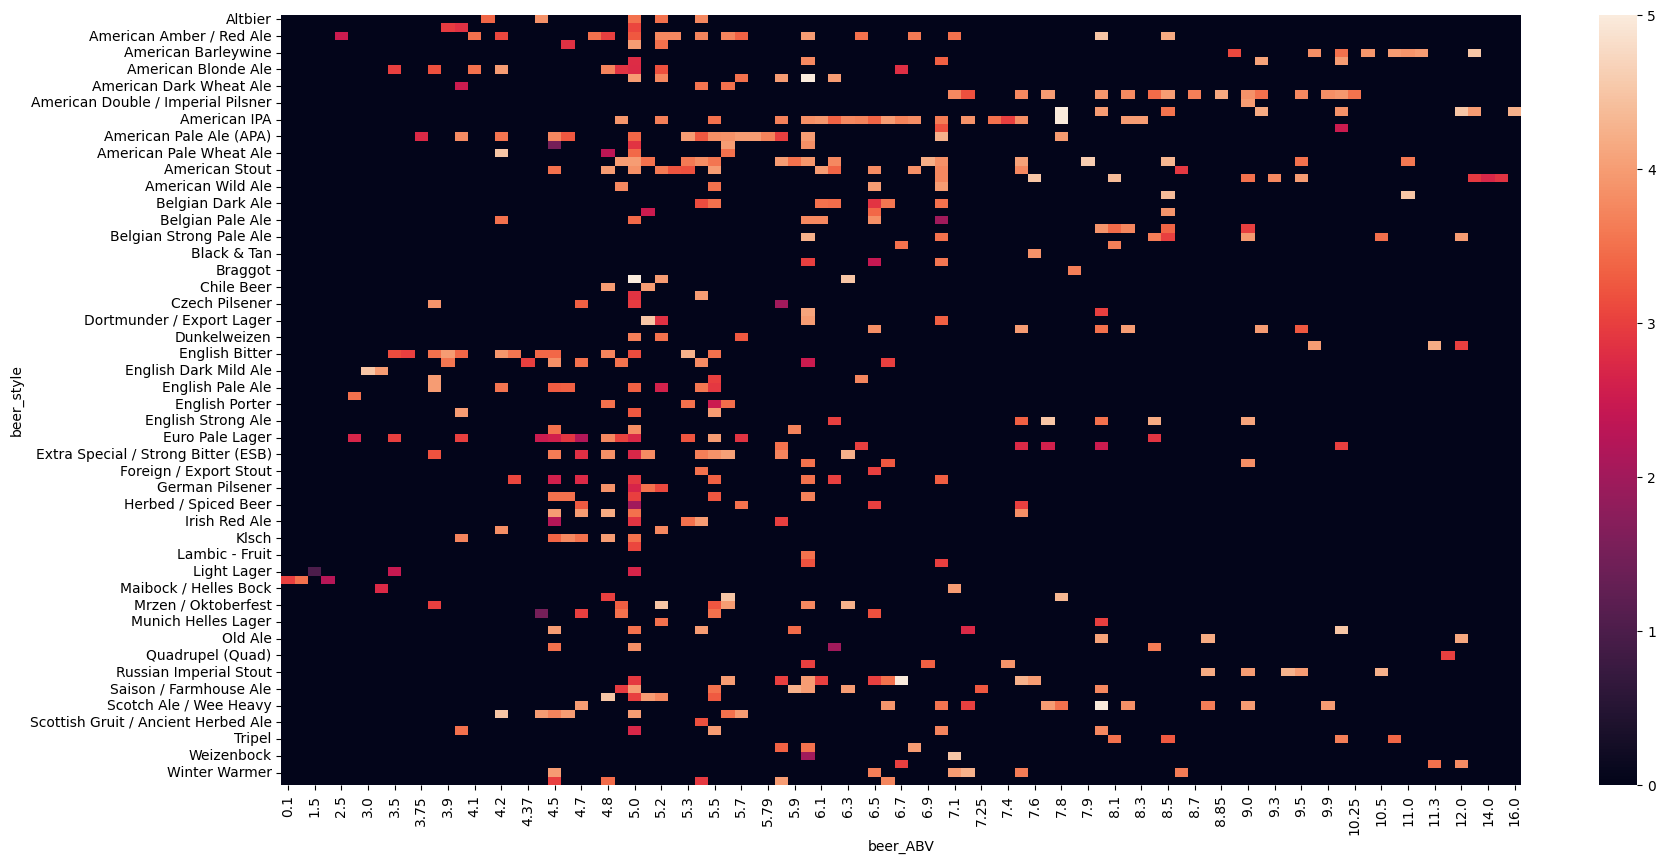

In [83]:
plt.figure(figsize=(20,10))
data = beers.pivot_table(index='beer_style',columns='beer_ABV',values='review_taste', aggfunc='mean', fill_value=0)
sns.heatmap(data)